In [1]:
import netCDF4 as nc
from pathlib import Path
import glob

#Array 
import xarray as xr
import numpy as np
import datetime as dt
import pandas as pd
import dask

#Visualize
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as colors
import cmcrameri.cm as cmc # batlow colourmap

#large data visualization
import datashader as ds
from datashader import transfer_functions as tf, reductions as rd

# Analyse
from scipy import signal
from scipy.interpolate import BSpline

#import tqdm
import seaborn as sns



import CL61_module
from CL61_module import module as mCL61

In [2]:
import importlib  # To reload files
importlib.reload(mCL61)

<module 'CL61_module.module' from 'c:\\Users\\gezas\\kDrive\\SIE-Project\\CL61\\CL61_module\\module.py'>

In [3]:
plt.style.use('bmh')

COLOR_MAP = 'cmc.batlow'

# Open dataset

In [4]:
februar_cl61 = mCL61.CL61Processor(folder_path='../CL61/Data', specific_filename='temp_20230204.nc')
june = mCL61.CL61Processor(folder_path='../CL61/Data', specific_filename='temp_1d_test.nc')

In [5]:
februar_cl61.mask_noise()
june.mask_noise()

kernel size [5, 5]
kernel size [1, 3]
kernel size [5, 5]
kernel size [1, 3]


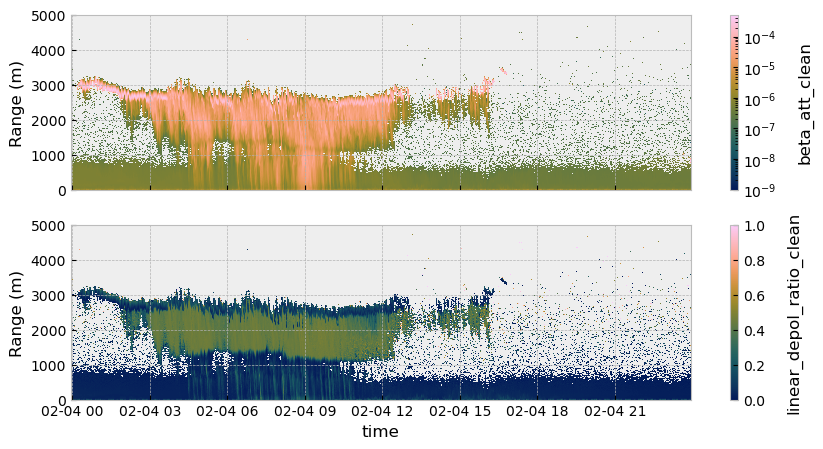

In [6]:
februar_cl61.visualize_data(plot_type='colormesh', varriable_names=['beta_att_clean', 'linear_depol_ratio_clean'])

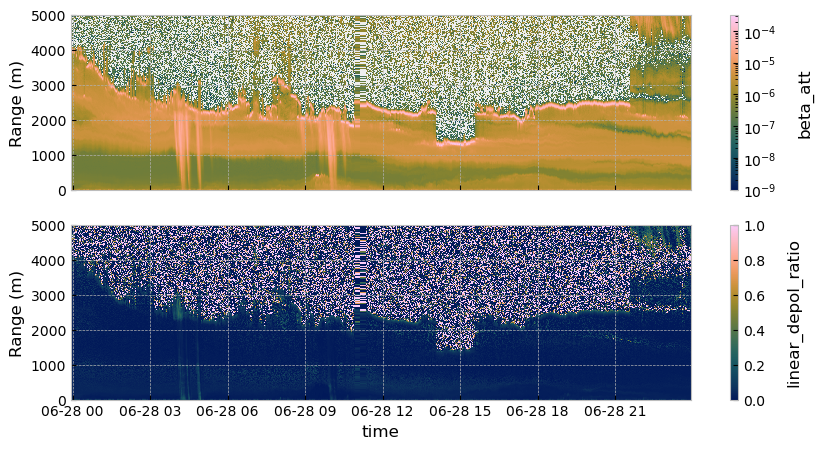

In [7]:
june.visualize_data(plot_type='colormesh')

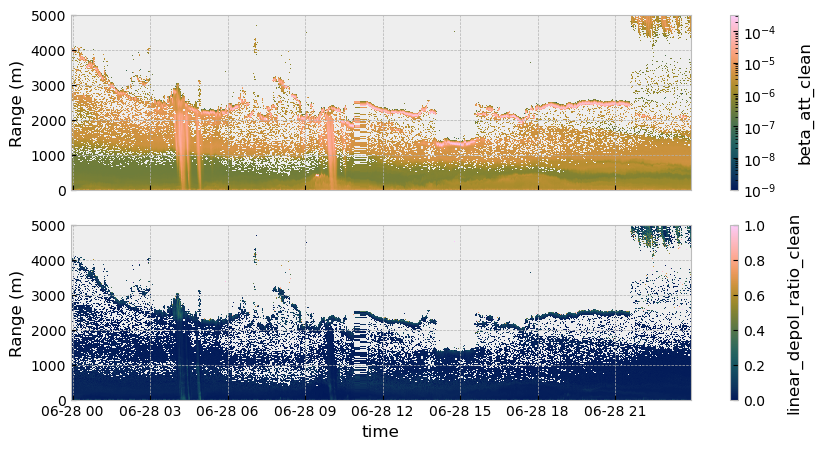

In [8]:
june.visualize_data(plot_type='colormesh', varriable_names=['beta_att_clean', 'linear_depol_ratio_clean'])

In [21]:
june.classify_data_kmean()

(4635540, 1)
Scaler means: [-5.64626956]  
 and scales: [0.51826226]


c:\Users\gezas\.conda\envs\atm\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyError: 'classified'

In [ ]:
depolarization_threshold = {
    'liquid_droplets': [0,0.2],
    'smoke' : [0.02, 0.1],
    'dust' : [0.1, 0.2],
    'snow': [0.2, 0.4],
    'ice crystals': [0.35, 1],
    'graupel':[0.4, 1]
}
